# 이상치
- 결측치, 범위에서 크게 벗어나는 데이터
- 분석 모델의 성능을 떨어뜨리거나 결과에 악영향을 미치는 경우 발생
- 이상치를 발견하면 확인 작업 후 특정한 값을 대체, 삭제
- 극단치 -> IQR 방식 
    - matplotlib에서  boxplot 함수를 이용하여 극단치를 확인
    - Q3(3사분위수)와 Q1(1사분위수)를 이용하여 범위 지정 
    - IQR = Q3 - Q1
    - 극단치의 경계 (Q3 + 1.5 * IQR), (Q1 - 1.5 * IQR)
    - 해당 경계값을 loc를 이용하여 확인 
    - 1.5 값을 조절하여 극단치의 범위를 변경

In [ ]:
# 사이킷런 설치 
# !pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [4]:
# 데이터셋 로드 
wine_load = load_wine()

In [ ]:
wine_load.keys()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
# data, feature_names를 이용해서 데이터프레임 생성 
wine = pd.DataFrame( wine_load['data'], 
                    columns=wine_load['feature_names'] )

In [9]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
# 종복변수인 target 데이터를 wine에 열 추가 
wine['class'] = wine_load['target']

In [13]:
wine_load['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [14]:
wine_load['frame']

In [15]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


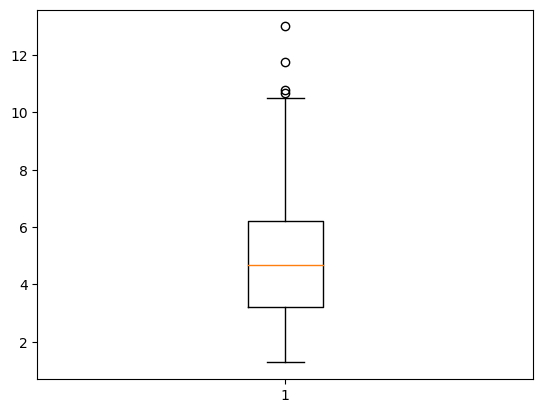

In [16]:
# color_intensity 데이터에서 극단치가 존재하는가?
# boxplot을 이용해서 확인 
plt.boxplot(wine['color_intensity'])
plt.show()

In [21]:
wine['color_intensity'].describe()['25%']

3.2199999999999998

In [24]:
# numpy 라이브러리를 이용해서 1사분위, 3사분위 수를 출력 
q_1, q_3 = np.percentile(wine['color_intensity'], [25, 75])

In [26]:
q_3

6.2

In [27]:
iqr = q_3 - q_1
upper_whis = q_3 + ( 1.5 * iqr )
lower_whis = q_1 - ( 1.5 * iqr )
print(upper_whis, lower_whis)

10.670000000000002 -1.2500000000000009


In [ ]:
flag = (wine['color_intensity'] > upper_whis) | \
    (wine['color_intensity'] < lower_whis)
flag

In [31]:
wine.loc[flag]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2


In [33]:
4 / len(wine)

0.02247191011235955

### iqr을 이용하여 극단치 판단하는 함수 
- 매개변수 3개 
    - _df : 데이터프레임 
    - _cols : 극단치를 판단하려고 하는 컬럼의 이름 (가변)
        - _cols의 타입은 tuple
    - _num : 신뢰구간 범위를 지정하는 수 기본값은 1.5
- 빈 딕셔너리를 생성
- _cols의 개수만큼 반복 실행 
    - 컬럼의 데이터를 기준으로 1사분위수, 3사분위수를 생성 
    - 1사분위수와 3사분위수를 이용하여 iqr 생성
    - 1사분위수, 3사분위수, iqr를 이용하여 극단치의 경계를 생성
    - 데이터프레임에서 극단치의 경계를 이용하여 극단치 데이터를 확인
    - 해당 데이터프레임 비어있는 딕셔너리에 key값은 컬럼의 이름으로 value는 데이터프레임으로 추가 
- 딕셔너리를 되돌려준다.

In [34]:
def outliers_iqr(
        _df, *_cols, _num = 1.5
):
    # 빈 딕셔너리를 생성 -> 함수의 결과 값
    result = dict()
    # _cols를 기준으로 반복 실행 
    for col in _cols:
        # col의 데이터에서 1사분위, 3사분위 수 변수에 저장 
        q_1, q_3 = np.percentile(_df[col], [25, 75])
        # iqr 생성 
        iqr = q_3 - q_1
        # 상단 경계, 하단 경계 생성 
        upper_whis = q_3 + ( _num * iqr )
        lower_whis = q_1 - ( _num * iqr )
        print(f"""
                {col} 컬럼의 데이터에서 
                상단의 극단치 경계 값은 {upper_whis}이고
                하단의 극단치 경계 값은 {lower_whis}입니다. 
              """)
        # 조건식 생성 
        flag = (_df[col] > upper_whis) | \
                (_df[col] < lower_whis)
        outlier = _df.loc[flag, ]
        result[col] = outlier
    return result

In [39]:
cols = list(wine.columns[:3])

In [45]:
# wine과 cols을 이용해서 함수에 입력값으로 대입 
# cols가 리스트형태 -> 가변 매개변수인 _cols에 대입하려면?
outliers = outliers_iqr(wine, *cols)


                alcohol 컬럼의 데이터에서 
                상단의 극단치 경계 값은 15.650000000000002이고
                하단의 극단치 경계 값은 10.389999999999997입니다. 
              

                malic_acid 컬럼의 데이터에서 
                상단의 극단치 경계 값은 5.3025이고
                하단의 극단치 경계 값은 -0.6174999999999997입니다. 
              

                ash 컬럼의 데이터에서 
                상단의 극단치 경계 값은 3.0787500000000003이고
                하단의 극단치 경계 값은 1.6887499999999998입니다. 
              


In [46]:
outliers['alcohol']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class


In [47]:
outliers['malic_acid']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0,1
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2


In [48]:
outliers['ash']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1


### 극단치의 정제 
1. 극단치를 제거 
    - 데이터의 개수가 매우 많고 극단치가 존재하는 데이터의 개수가 전체 데이터의 비해서 매우 작은 경우에는 제거 
    - 극단치 제거 -> 데이터의 개수가 감소
2. 극단치를 특정 데이터로 대체
    - 극단치의 값들을 다른 값으로 대체하는 경우는 데이터 분석가에 따라서 값들은 차이 발생

In [49]:
df = wine.copy()

In [51]:
# 극단치를 제거 -> ash 컬럼에서 극단치 제거 
# drop() -> 조건에 따라 행을 제거할것인가 열을 제거할것인가
    # 조건 -> outliers['ash']의 인덱스의 값
    # 행을 제거 -> axis = 0
df.drop(outliers['ash'].index, axis=0, inplace=True)

In [52]:
print(f"원본 데이터의 개수 : {len(wine)}")
print(f"극단치가 제거된 데이터의 개수 : {len(df)}")

원본 데이터의 개수 : 178
극단치가 제거된 데이터의 개수 : 175


In [53]:
# 상단경계보다 높은 극단치의 데이터를 극단치를 제외한 max 값으로 대체
# 하단경계보다 낮은 극단치의 데이터를 극단치를 제외한 min 값으로 대체
max_value = df['ash'].max()
min_value = df['ash'].min()

In [54]:
print(max_value, min_value)

2.92 1.7


In [55]:
center_value = np.percentile(df['ash'], 50)

In [58]:
df2 = wine.copy()

In [ ]:
# 상단경계보다 높은 극단치의 데이터를 극단치를 제외한 max 값으로 대체
# 조건 -> outliers['ash']에서 center_value보다 큰 데이터의 index
flag = outliers['ash']['ash'] > center_value


Index([25, 59, 121], dtype='int64')

In [71]:
flag_index= []
for i in flag.index:
    # print(flag[i])
    if flag[i]:
        # print(i)
        flag_index.append(i)

In [74]:
df2.loc[flag_index, 'ash'] = max_value

In [75]:
flag_index= []
for i in flag.index:
    # print(flag[i])
    if not(flag[i]):
        # print(i)
        flag_index.append(i)

In [77]:
flag_index

[59]

In [78]:
df2.loc[flag_index, 'ash'] = min_value

In [80]:
df2['ash'].describe()

count    178.000000
mean       2.365000
std        0.259195
min        1.700000
25%        2.210000
50%        2.360000
75%        2.557500
max        2.920000
Name: ash, dtype: float64

In [79]:
df3 = wine.copy()

In [81]:
df3['ash'].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: ash, dtype: float64

In [83]:
# max_value보다 크다면 -> 상단 극단치 경계보다 높은 데이터 
flag = df3['ash'] > max_value

df3.loc[flag, 'ash'] = max_value

In [85]:
flag = df3['ash'] < min_value
df3.loc[flag, 'ash'] = min_value

In [86]:
df3['ash'].describe()

count    178.000000
mean       2.365000
std        0.259195
min        1.700000
25%        2.210000
50%        2.360000
75%        2.557500
max        2.920000
Name: ash, dtype: float64